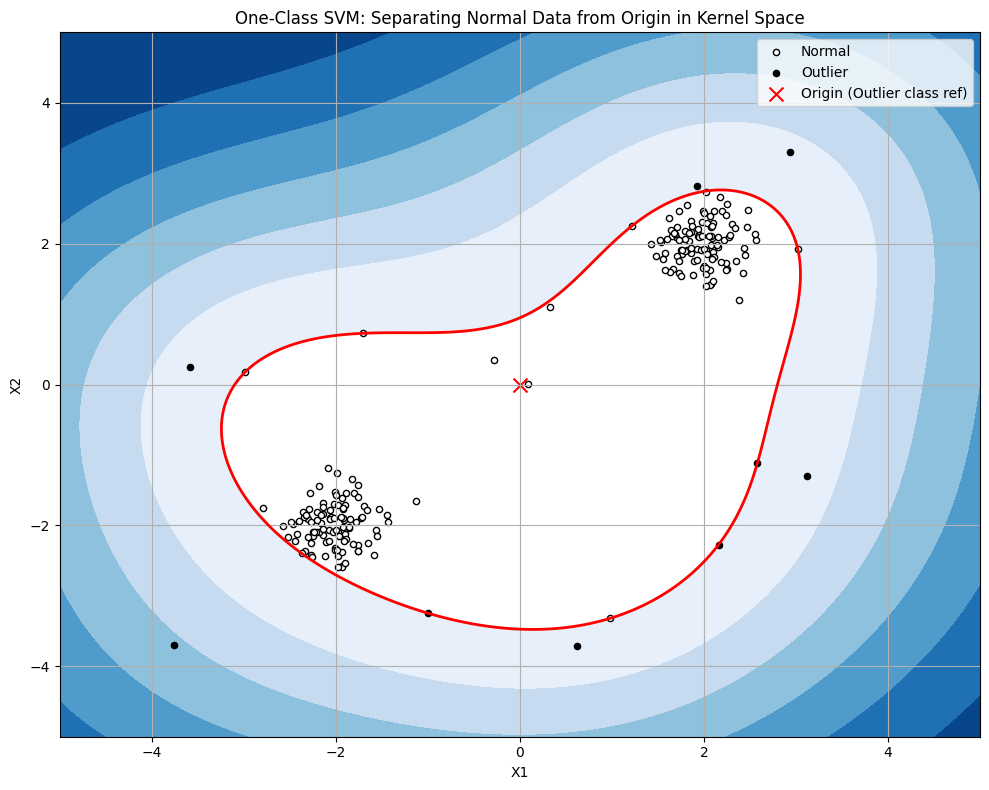

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Generate synthetic 2D normal data (clustered)
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]  # two clusters

# Add some outliers
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine the data
X = np.r_[X_normal, X_outliers]

# Fit One-Class SVM
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X)

# Predict labels (-1 for outliers, 1 for inliers)
y_pred = clf.predict(X)

# Create a mesh grid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='white', s=20, edgecolor='k', label='Normal')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='black', s=20, edgecolor='k', label='Outlier')
plt.scatter(0, 0, c='red', s=100, marker='x', label='Origin (Outlier class ref)')
plt.title("One-Class SVM: Separating Normal Data from Origin in Kernel Space")
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.show()


## W⋅Φ(X)−b=0


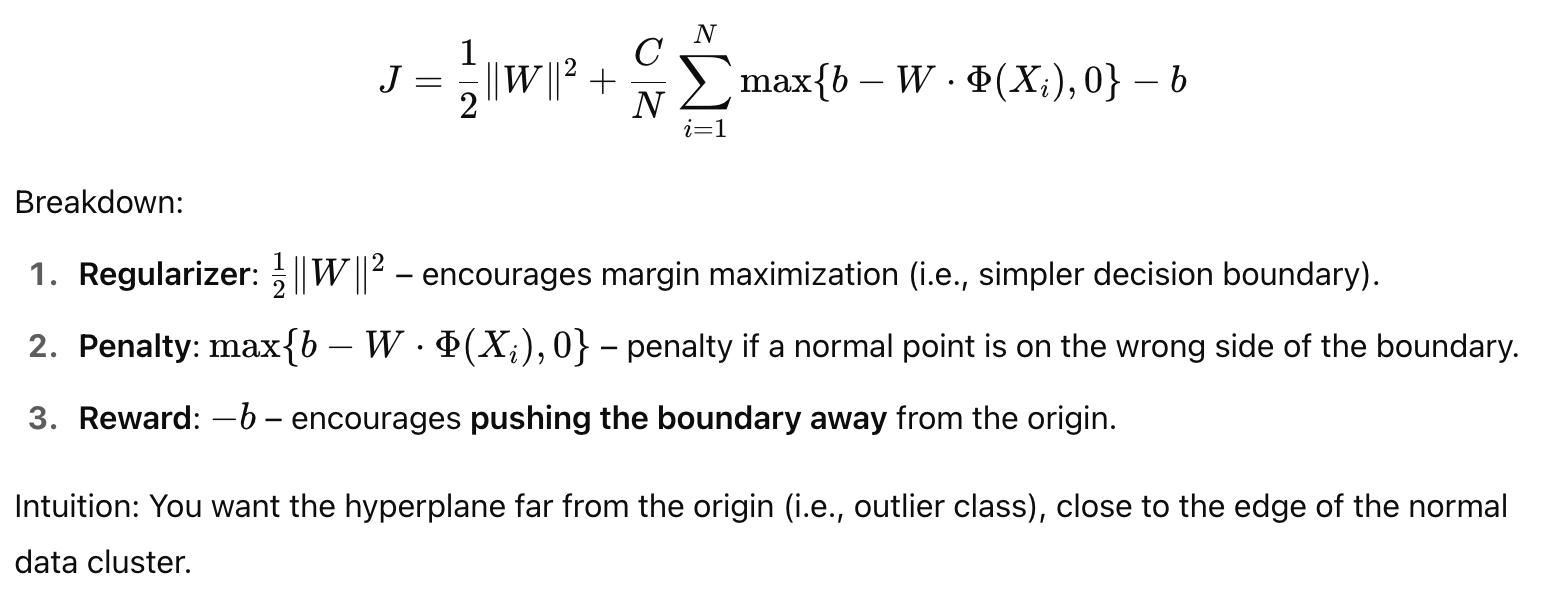

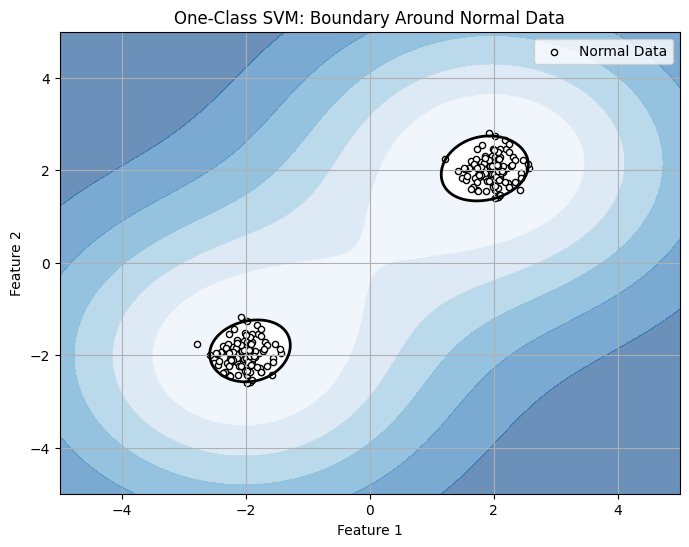

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Generate 2D normal data (normal points)
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X = np.r_[X + 2, X - 2]  # Two normal clusters

# Fit One-Class SVM
clf = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # nu = expected outlier ratio
clf.fit(X)

# Create grid for plotting
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r, alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # boundary
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolors='k', label='Normal Data')
plt.title("One-Class SVM: Boundary Around Normal Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


## Matrix Factorization

In [2]:
# Re-run after kernel reset
import numpy as np
from numpy.linalg import svd, norm

# Create a mean-centered data matrix D (e.g., N=100 samples, d=5 features)
np.random.seed(0)
D = np.random.randn(100, 5)
D = D - np.mean(D, axis=0)  # mean-centering

# Perform full SVD: D = U_full * S_full * Vt_full
U_full, S_full, Vt_full = svd(D, full_matrices=False)

# Choose rank-k approximation
k = 2
Q_k = U_full[:, :k]            # N x k
Lambda_k = np.diag(S_full[:k])  # k x k
P_k = Vt_full[:k, :].T         # d x k

# Equation (3.25): D' = D @ P_k
D_prime = D @ P_k  # N x k

# Equation (3.26): D' ≈ Q_k @ Lambda_k
D_prime_approx = Q_k @ Lambda_k

# Equation (3.27): D ≈ Q_k @ Lambda_k @ P_k.T
D_reconstructed = Q_k @ Lambda_k @ P_k.T

# Equation (3.28): D ≈ U @ V.T (using matrix factorization form)
U = Q_k @ Lambda_k
V = P_k
D_uvt = U @ V.T

# Compute reconstruction errors
error_svd = norm(D - D_reconstructed)
error_uvt = norm(D - D_uvt)

import pandas as pd
dataframe=pd.DataFrame({
    'Method': ['SVD-based', 'U @ V.T (Low-rank)'],
    'Reconstruction Error (Frobenius Norm)': [error_svd, error_uvt]
})
dataframe


,Method,Reconstruction Error (Frobenius Norm)
0,SVD-based,16.104541
1,U @ V.T (Low-rank),16.104541


# Proximity-Based

## Euclidean vs. Mahalanobis Distance

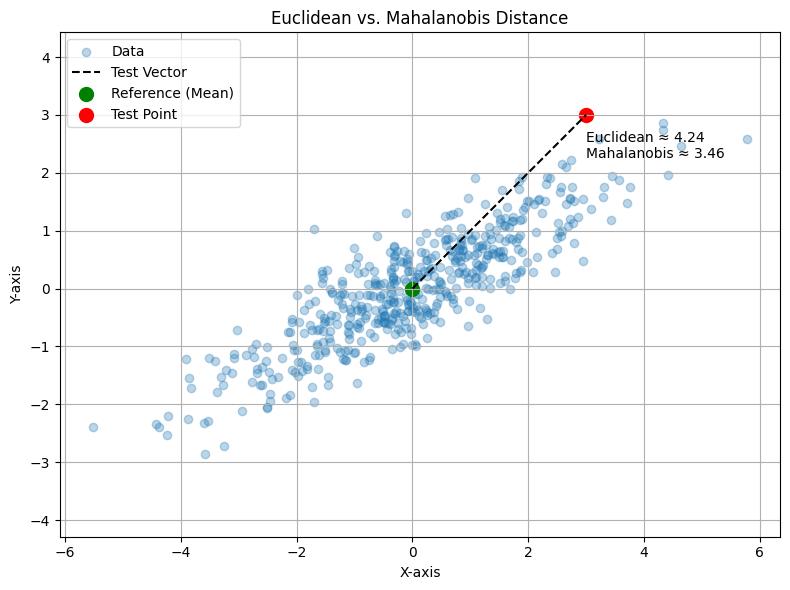

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

# Create a 2D Gaussian distribution with non-spherical covariance
mean = np.array([0, 0])
cov = np.array([[3, 1.5], [1.5, 1]])  # strong correlation

# Generate data
np.random.seed(42)
data = np.random.multivariate_normal(mean, cov, size=500)

# Define a reference point (e.g., center) and a test point
ref_point = mean
test_point = np.array([3, 3])

# Compute distances
inv_cov = inv(cov)
euclidean_dist = np.linalg.norm(test_point - ref_point)
mahalanobis_dist = mahalanobis(test_point, ref_point, inv_cov)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Data")
plt.plot(*zip(ref_point, test_point), 'k--', label='Test Vector')

# Reference point and test point
plt.scatter(*ref_point, color='green', label='Reference (Mean)', s=100)
plt.scatter(*test_point, color='red', label='Test Point', s=100)

# Annotations
plt.text(*test_point, f"\nEuclidean ≈ {euclidean_dist:.2f}\nMahalanobis ≈ {mahalanobis_dist:.2f}", 
         ha='left', va='top', fontsize=10)

plt.title("Euclidean vs. Mahalanobis Distance")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


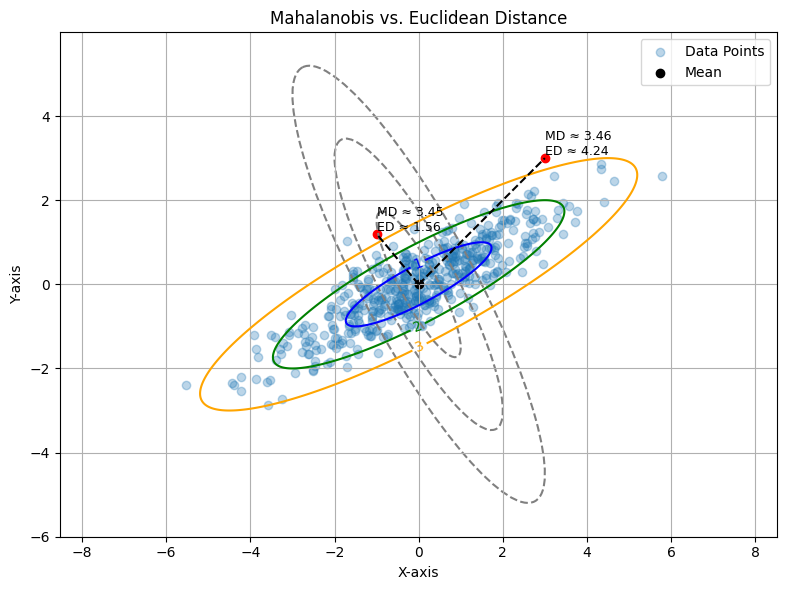

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

# Generate 2D Gaussian data
mean = np.array([0, 0])
cov = np.array([[3, 1.5], [1.5, 1]])
inv_cov = inv(cov)
np.random.seed(42)
data = np.random.multivariate_normal(mean, cov, size=500)

# Create grid for Mahalanobis contours
x, y = np.mgrid[-6:6:.01, -6:6:.01]
pos = np.dstack((x, y))
mahal_grid = np.array([
    [mahalanobis([xi, yi], mean, inv_cov) for xi, yi in row]
    for row in pos
])

# Test points
test_point1 = np.array([3, 3])
test_point2 = np.array([-1, 1.2])

# Distances
mahal_dist1 = mahalanobis(test_point1, mean, inv_cov)
euclid_dist1 = np.linalg.norm(test_point1 - mean)

mahal_dist2 = mahalanobis(test_point2, mean, inv_cov)
euclid_dist2 = np.linalg.norm(test_point2 - mean)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label='Data Points')

# Mahalanobis contour
contour = plt.contour(x, y, mahal_grid, levels=[1, 2, 3], colors=['blue', 'green', 'orange'])
plt.clabel(contour, inline=1, fontsize=10)

# Add mean
plt.scatter(*mean, color='black', label='Mean')

# Plot test points with annotations
for point, md, ed in zip([test_point1, test_point2], [mahal_dist1, mahal_dist2], [euclid_dist1, euclid_dist2]):
    plt.scatter(*point, color='red')
    plt.plot([mean[0], point[0]], [mean[1], point[1]], 'k--')
    plt.text(*point, f"MD ≈ {md:.2f}\nED ≈ {ed:.2f}", fontsize=9, ha='left', va='bottom')

# Draw ellipses representing covariance structure
eigvals, eigvecs = np.linalg.eigh(cov)
for nsig in range(1, 4):
    width, height = 2 * nsig * np.sqrt(eigvals)
    angle = np.degrees(np.arctan2(*eigvecs[:, 1][::-1]))
    ellip = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='gray',
                    fc='none', lw=1.5, linestyle='--')
    plt.gca().add_patch(ellip)

# Style
plt.title("Mahalanobis vs. Euclidean Distance")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()



## Cluster-based vs Density-based

| Visual Type                    | Cluster-based flags | Density-based flags |
| ------------------------------ | ------------------- | ------------------- |
| 🟡 Far & tight group           | ✅ Yes               | ❌ No                |
| 🟢 Borderline between clusters | ❌ Often missed      | ✅ Often detected    |
| 🟢 Arbtriray shape             | ❌ Often missed      | ✅ Often detected    |
  


### Far & tight group  

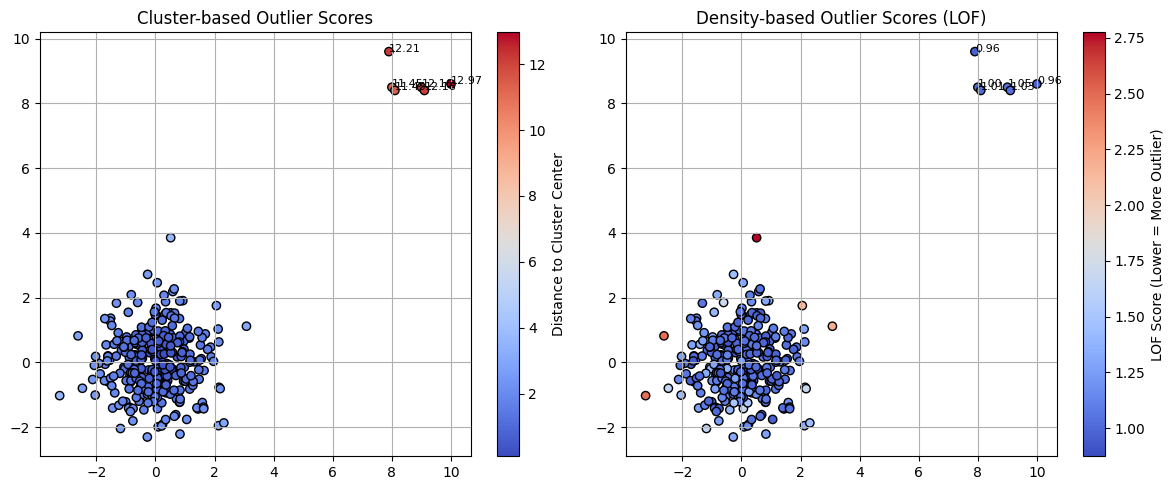

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Generate a main cluster
X_main, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=1.0, random_state=42)

# Create a tight, far group (outlier to cluster-based, not to density-based)
tight_far_group = np.array([[8, 8.5], [8.1, 8.4], [10, 8.6],[9, 8.5], [9.1, 8.4], [7.9, 9.6]])

# Combine all
X_all = np.vstack([X_main, tight_far_group])

# Cluster-based outlier score (distance to cluster center)
kmeans = KMeans(n_clusters=1, random_state=42).fit(X_all)
cluster_center = kmeans.cluster_centers_[0]
cluster_outlier_scores = np.linalg.norm(X_all - cluster_center, axis=1)

# Density-based outlier score (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=5)
lof_scores = -lof.fit_predict(X_all)
lof_outlier_scores = -lof.negative_outlier_factor_

# Plot both results and annotate the tight far group with scores
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cluster-based
sc1 = axs[0].scatter(X_all[:, 0], X_all[:, 1], c=cluster_outlier_scores, cmap='coolwarm', edgecolor='k')
axs[0].set_title("Cluster-based Outlier Scores")
cb1 = plt.colorbar(sc1, ax=axs[0])
cb1.set_label("Distance to Cluster Center")

# Density-based
sc2 = axs[1].scatter(X_all[:, 0], X_all[:, 1], c=lof_outlier_scores, cmap='coolwarm', edgecolor='k')
axs[1].set_title("Density-based Outlier Scores (LOF)")
cb2 = plt.colorbar(sc2, ax=axs[1])
cb2.set_label("LOF Score (Lower = More Outlier)")

# Annotate the tight far group with scores
for i in range(len(X_main), len(X_all)):
    axs[0].annotate(f"{cluster_outlier_scores[i]:.2f}", (X_all[i, 0], X_all[i, 1]), fontsize=8, color='black')
    axs[1].annotate(f"{lof_outlier_scores[i]:.2f}", (X_all[i, 0], X_all[i, 1]), fontsize=8, color='black')

for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


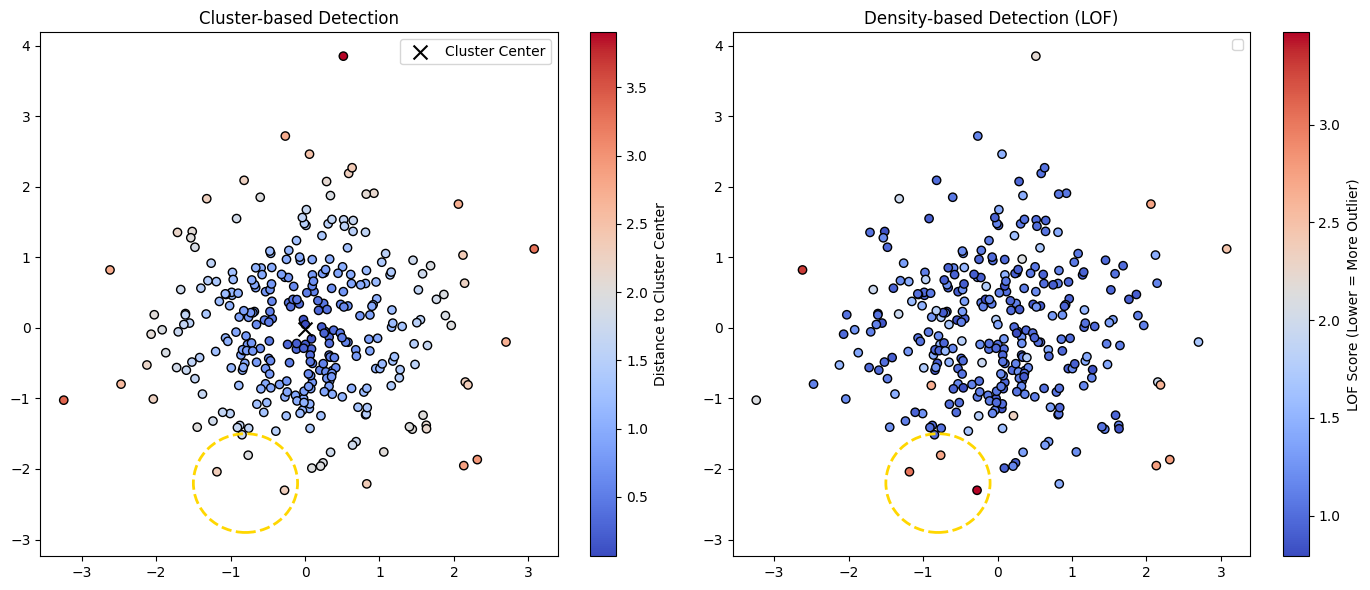

In [36]:
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Generate clustered data
X, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=1.0, random_state=42)

# Add sparse edge points near the cluster
sparse_edge_points = np.array([ [2.7, -0.2]])
X_all = np.vstack([X, sparse_edge_points])

#circle_center = sparse_edge_points.mean(axis=0)
circle_center = [-0.8,-2.2]
circle_radius = 0.7

# Cluster-based outlier scores (distance to cluster center)
kmeans = KMeans(n_clusters=1, random_state=42).fit(X_all)
center = kmeans.cluster_centers_[0]
cluster_scores = np.linalg.norm(X_all - center, axis=1)

# Density-based outlier scores (LOF)
lof = LocalOutlierFactor(n_neighbors=2)
lof.fit(X_all)
lof_scores = -lof.negative_outlier_factor_

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Cluster-based plot
sc1 = axs[0].scatter(X_all[:, 0], X_all[:, 1], c=cluster_scores, cmap='coolwarm', edgecolor='k')
axs[0].scatter(center[0], center[1], marker='x', color='black', s=100, label='Cluster Center')
circle1 = plt.Circle(circle_center, circle_radius, color='gold', fill=False, linewidth=2, linestyle='--')
axs[0].add_patch(circle1)
#axs[0].scatter(sparse_edge_points[:, 0], sparse_edge_points[:, 1], marker='o', color='gold', edgecolor='k', s=100, label='Sparse Edge Points')
axs[0].set_title("Cluster-based Detection")
cb1 = plt.colorbar(sc1, ax=axs[0])
cb1.set_label("Distance to Cluster Center")
axs[0].legend()

# Density-based plot
sc2 = axs[1].scatter(X_all[:, 0], X_all[:, 1], c=lof_scores, cmap='coolwarm', edgecolor='k')
#axs[1].scatter(sparse_edge_points[:, 0], sparse_edge_points[:, 1], marker='o', color='gold', edgecolor='k', s=100, label='Sparse Edge Points')
axs[1].set_title("Density-based Detection (LOF)")
circle2 = plt.Circle(circle_center, circle_radius, color='gold', fill=False, linewidth=2, linestyle='--')
axs[1].add_patch(circle2)
cb2 = plt.colorbar(sc2, ax=axs[1])
cb2.set_label("LOF Score (Lower = More Outlier)")
axs[1].legend()

plt.tight_layout()
plt.show()


### Borderline between clusters

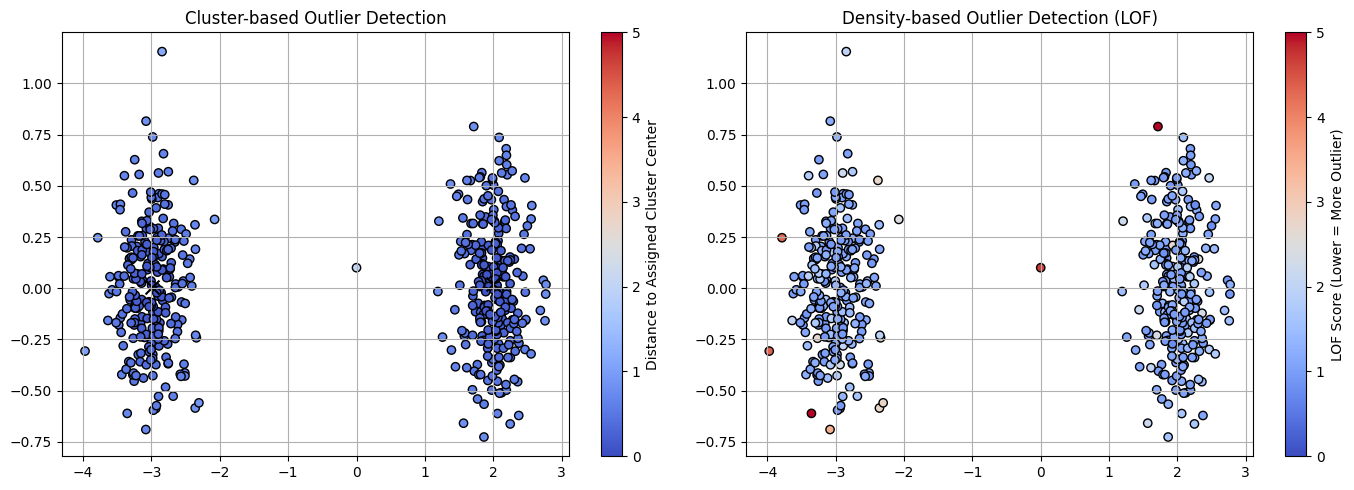

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Generate two clusters close together
X, _ = make_blobs(n_samples=500, centers=[[-3, 0], [2, 0]], cluster_std=0.3, random_state=42)

# Add borderline point between the clusters
borderline_points = np.array([[0, 0.1]])

# Combine into one dataset
X_extra = np.vstack([X, borderline_points])

# Cluster-based outlier scores
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_extra)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X_extra)
cluster_outlier_scores = np.array([np.linalg.norm(x - centers[labels[i]]) for i, x in enumerate(X_extra)])

# Density-based (LOF)
lof = LocalOutlierFactor(n_neighbors=2)
lof_scores = -lof.fit_predict(X_extra)
lof_outlier_scores = -lof.negative_outlier_factor_

# Standardize color range across both plots
vmin = 0
vmax = 5

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Cluster-based
sc1 = axs[0].scatter(X_extra[:, 0], X_extra[:, 1], c=cluster_outlier_scores, cmap='coolwarm',
                     edgecolor='k', vmin=vmin, vmax=vmax)
axs[0].scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100)
axs[0].set_title("Cluster-based Outlier Detection")
cb1 = plt.colorbar(sc1, ax=axs[0])
cb1.set_label("Distance to Assigned Cluster Center")

# Density-based
sc2 = axs[1].scatter(X_extra[:, 0], X_extra[:, 1], c=lof_outlier_scores, cmap='coolwarm',
                     edgecolor='k', vmin=vmin, vmax=vmax)
axs[1].set_title("Density-based Outlier Detection (LOF)")
cb2 = plt.colorbar(sc2, ax=axs[1])
cb2.set_label("LOF Score (Lower = More Outlier)")

for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()



### Arbtriray shape

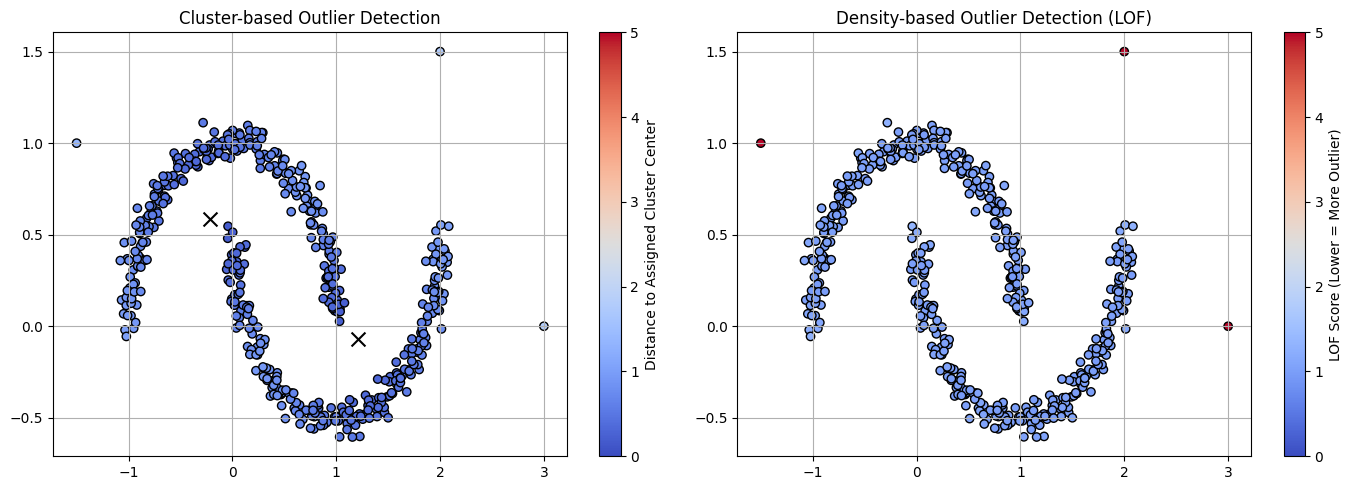

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Generate moon-shaped clusters (arbitrary shapes)
X = make_moons(n_samples=500, noise=0.05, random_state=42)

# Add a few outliers outside the moon shapes
outliers = np.array([[2, 1.5], [1.5, -0.5], [-1.5, 1], [3, 0]])
X_extra = np.vstack([X[0], outliers])

# Cluster-based detection
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_extra)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X_extra)
cluster_outlier_scores = np.array([np.linalg.norm(x - centers[labels[i]]) for i, x in enumerate(X_extra)])

# Density-based (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
lof_scores = -lof.fit_predict(X_extra)
lof_outlier_scores = -lof.negative_outlier_factor_

# Set consistent color scale
vmin = 0
vmax = 5

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Cluster-based
sc1 = axs[0].scatter(X_extra[:, 0], X_extra[:, 1], c=cluster_outlier_scores, cmap='coolwarm',
                     edgecolor='k', vmin=vmin, vmax=vmax)
axs[0].scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100)
axs[0].set_title("Cluster-based Outlier Detection")
cb1 = plt.colorbar(sc1, ax=axs[0])
cb1.set_label("Distance to Assigned Cluster Center")

# Density-based
sc2 = axs[1].scatter(X_extra[:, 0], X_extra[:, 1], c=lof_outlier_scores, cmap='coolwarm',
                     edgecolor='k', vmin=vmin, vmax=vmax)
axs[1].set_title("Density-based Outlier Detection (LOF)")
cb2 = plt.colorbar(sc2, ax=axs[1])
cb2.set_label("LOF Score (Lower = More Outlier)")

for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()


## Distance-Based 

### KNN algorithm

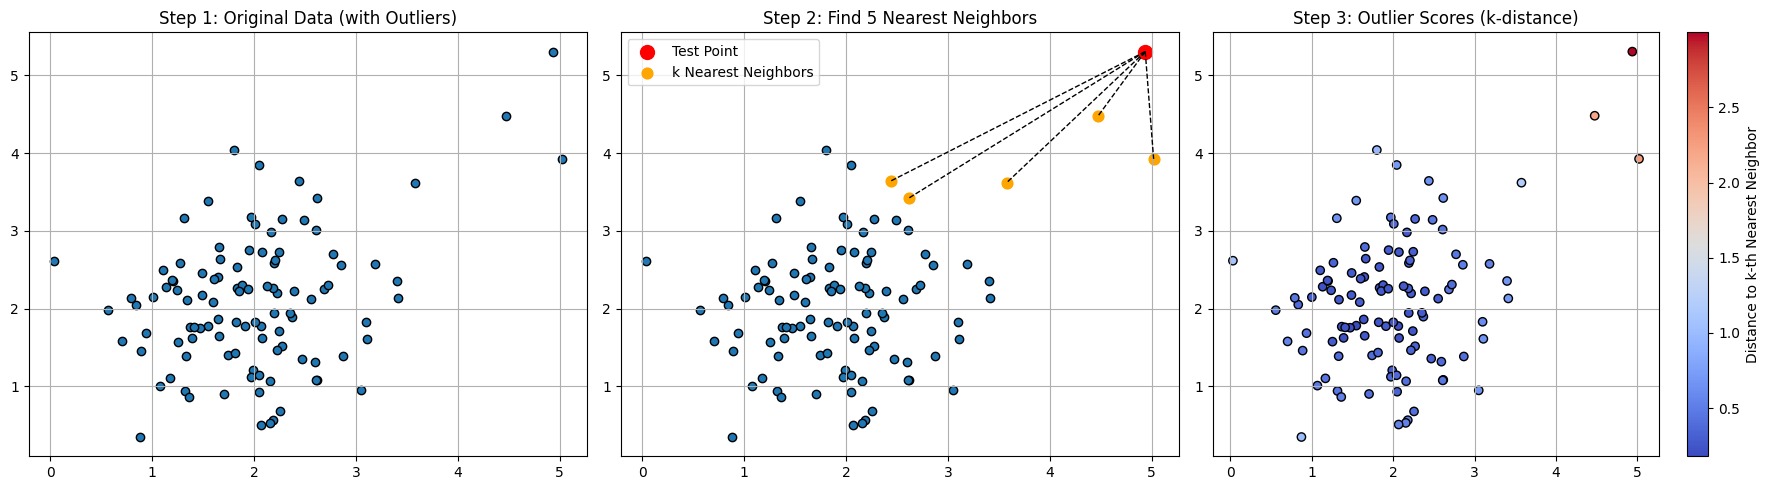

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 1: Generate synthetic data with some outliers
np.random.seed(42)
X_normal = np.random.randn(100, 2) * 0.75 + np.array([2, 2])
X_outliers = np.random.uniform(low=-2, high=6, size=(5, 2))
X_all = np.vstack([X_normal, X_outliers])

# Step 2: Fit NearestNeighbors model
k = 5
nn = NearestNeighbors(n_neighbors=k+1)  # +1 because the point itself is included
nn.fit(X_all)
distances, indices = nn.kneighbors(X_all)

# Step 3: Calculate k-distance (distance to k-th nearest neighbor)
k_distances = distances[:, -1]

# Step 4: Plot data and step-by-step annotation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axs[0].scatter(X_all[:, 0], X_all[:, 1], edgecolor='k')
axs[0].set_title("Step 1: Original Data (with Outliers)")
axs[0].grid(True)

# Show k-nearest neighbors for a specific point
sample_idx = -1  # an outlier
neighbors_idx = indices[sample_idx][1:]  # exclude itself
axs[1].scatter(X_all[:, 0], X_all[:, 1], edgecolor='k')
axs[1].scatter(X_all[sample_idx, 0], X_all[sample_idx, 1], color='red', s=100, label='Test Point')
axs[1].scatter(X_all[neighbors_idx, 0], X_all[neighbors_idx, 1], color='orange', s=60, label='k Nearest Neighbors')
for idx in neighbors_idx:
    axs[1].plot([X_all[sample_idx, 0], X_all[idx, 0]],
                [X_all[sample_idx, 1], X_all[idx, 1]], 'k--', lw=1)
axs[1].set_title(f"Step 2: Find {k} Nearest Neighbors")
axs[1].legend()
axs[1].grid(True)

# Step 3: Color by k-distance (outlier score)
sc = axs[2].scatter(X_all[:, 0], X_all[:, 1], c=k_distances, cmap='coolwarm', edgecolor='k')
axs[2].set_title("Step 3: Outlier Scores (k-distance)")
cb = plt.colorbar(sc, ax=axs[2])
cb.set_label("Distance to k-th Nearest Neighbor")
axs[2].grid(True)

plt.tight_layout()
plt.show()


%md
# Computation

https://scikit-learn.org/stable/computing/scaling_strategies.html

https://scikit-learn.org/stable/computing/parallelism.html#parallelism

K-means
https://scikit-learn.org/stable/modules/clustering.html#low-level-parallelism


### Cell-Based Pruning
🟥 Red Dot: Query Point
This is the point for which we want to find the k-nearest neighbors (k = 3).

🟩 Green Box: Query Cell
The grid partitions the space into square cells (in this case, 2x2 units).
The query point falls into the green-highlighted cell.

🟧 Orange Dots: Candidate Points
We only search for neighbors in the query cell and its 8 surrounding neighbors (3x3 block), drastically reducing the number of comparisons.

🔵 Blue Dots: Actual k-Nearest Neighbors
After searching among candidate points, we find the 3 closest ones.

✅ Key Advantage:
Instead of checking all 100 points, we narrowed down to ~20 candidates — a big saving for large datasets!

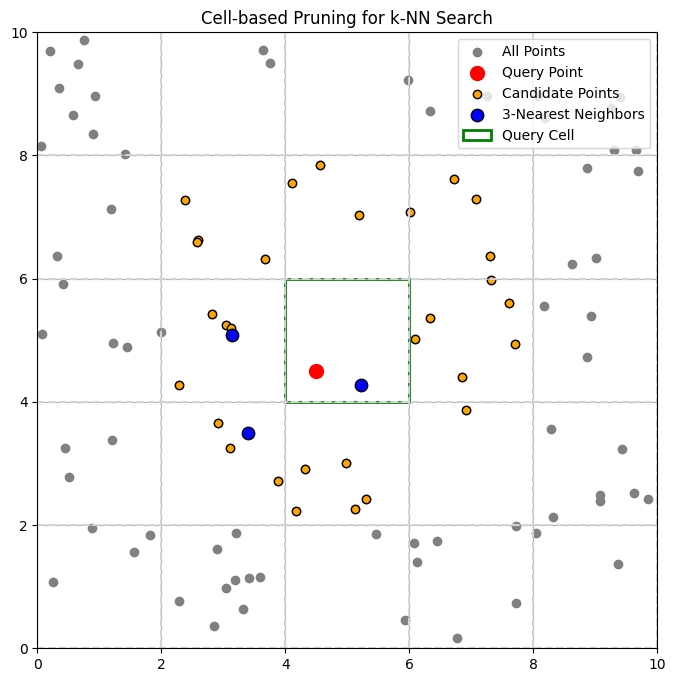

In [ ]:
#@title  Cell-Based Pruning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.neighbors import NearestNeighbors

# Step 1: Create synthetic 2D dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points in 10x10 space
query_point = np.array([4.5, 4.5])
k = 3

# Step 2: Define grid (cell size = 2 units)
cell_size = 2
grid = {}
for i, point in enumerate(X):
    cell = tuple((point // cell_size).astype(int))
    if cell not in grid:
        grid[cell] = []
    grid[cell].append(i)

# Determine query point's cell
query_cell = tuple((query_point // cell_size).astype(int))
neighbor_cells = [(query_cell[0] + dx, query_cell[1] + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1]]

# Points in relevant cells
candidate_indices = []
for cell in neighbor_cells:
    if cell in grid:
        candidate_indices.extend(grid[cell])
candidates = X[candidate_indices]

# Step 3: Find k-nearest neighbors among candidates
nn = NearestNeighbors(n_neighbors=k)
nn.fit(candidates)
dists, idxs = nn.kneighbors([query_point])
knn_points = candidates[idxs[0]]

# Step 4: Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Draw grid
for i in range(0, 11, cell_size):
    ax.axhline(i, color='lightgray', linestyle='--')
    ax.axvline(i, color='lightgray', linestyle='--')

# Plot all points
ax.scatter(X[:, 0], X[:, 1], color='gray', label='All Points')

# Plot query point
ax.scatter(query_point[0], query_point[1], color='red', s=100, label='Query Point')

# Highlight candidate points
ax.scatter(candidates[:, 0], candidates[:, 1], edgecolor='black', facecolor='orange', label='Candidate Points')

# Highlight k-NN
ax.scatter(knn_points[:, 0], knn_points[:, 1], color='blue', edgecolor='black', s=80, label=f'{k}-Nearest Neighbors')

# Annotate the grid cell of the query point
x0, y0 = np.array(query_cell) * cell_size
ax.add_patch(Rectangle((x0, y0), cell_size, cell_size, fill=False, edgecolor='green', linewidth=2, label='Query Cell'))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Cell-based Pruning for k-NN Search")
ax.legend(loc='upper right')
plt.grid(True)
plt.show()


### Sampling-based Pruning

🔴 Red Dot: Query Point
This is the target point for which we want to find the nearest neighbors.

🟠 Orange Dots: Sampled Points

Instead of scanning all 500 points, we randomly sample 10% of the data (≈ 50 points). This prunes the search space, greatly reducing computation.

🔵 Blue Dots: Approximate k-NN (from Sample)

We run k-NN on just the sampled subset to get approximate neighbors.

🟢 Green Hollow Dots: True k-NN (from Full Data)

For reference, we compute the true neighbors from the full dataset. You can see there’s a small difference, which is the trade-off for efficiency.

✅ Key Insight:

Sampling allows for fast, approximate results.

This is particularly useful in very large datasets.

Optional: After sampling, you can do refinement by computing exact k-NN on a smaller candidate set.

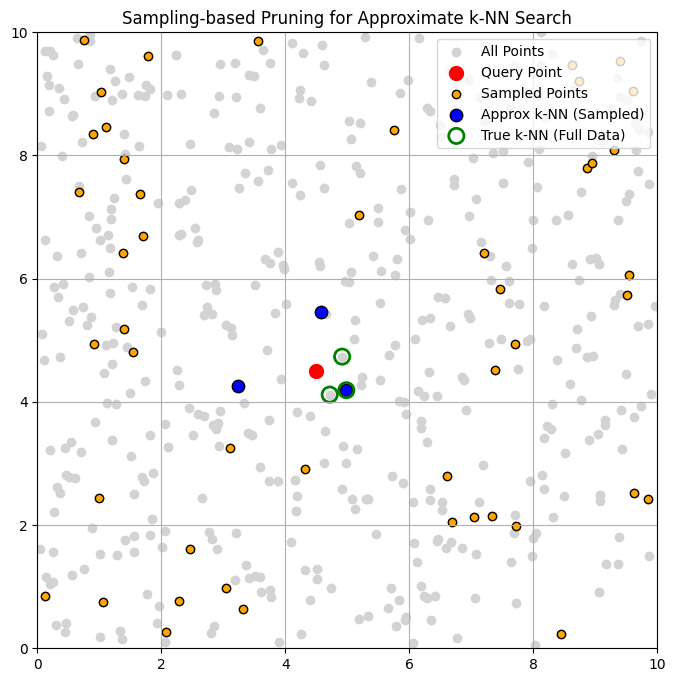

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(500, 2) * 10  # 500 points in a 10x10 space
query_point = np.array([4.5, 4.5])
k = 3

# Step 2: Sampling-based pruning
sample_ratio = 0.1
sample_size = int(sample_ratio * len(X))
sample_indices = np.random.choice(len(X), sample_size, replace=False)
sample_set = X[sample_indices]

# Step 3: Approximate k-NN using the sample
approx_nn = NearestNeighbors(n_neighbors=k)
approx_nn.fit(sample_set)
_, sample_idxs = approx_nn.kneighbors([query_point])
approx_knn = sample_set[sample_idxs[0]]

# Step 4: Final refinement (optional): compute exact k-NN from remaining candidates
# Usually done only if needed; here we'll show true k-NN from full set for comparison
true_nn = NearestNeighbors(n_neighbors=k)
true_nn.fit(X)
_, full_idxs = true_nn.kneighbors([query_point])
true_knn = X[full_idxs[0]]

# Step 5: Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot full data
ax.scatter(X[:, 0], X[:, 1], color='lightgray', label='All Points')

# Plot query point
ax.scatter(query_point[0], query_point[1], color='red', s=100, label='Query Point')

# Highlight sampled set
ax.scatter(sample_set[:, 0], sample_set[:, 1], color='orange', edgecolor='black', label='Sampled Points')

# Approximate k-NN
ax.scatter(approx_knn[:, 0], approx_knn[:, 1], color='blue', edgecolor='black', s=80, label='Approx k-NN (Sampled)')

# True k-NN
ax.scatter(true_knn[:, 0], true_knn[:, 1], facecolors='none', edgecolors='green', s=120, label='True k-NN (Full Data)', linewidths=2)

ax.set_title("Sampling-based Pruning for Approximate k-NN Search")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(True)
ax.legend(loc='upper right')
plt.show()


## LOF: Local Outlier Factor

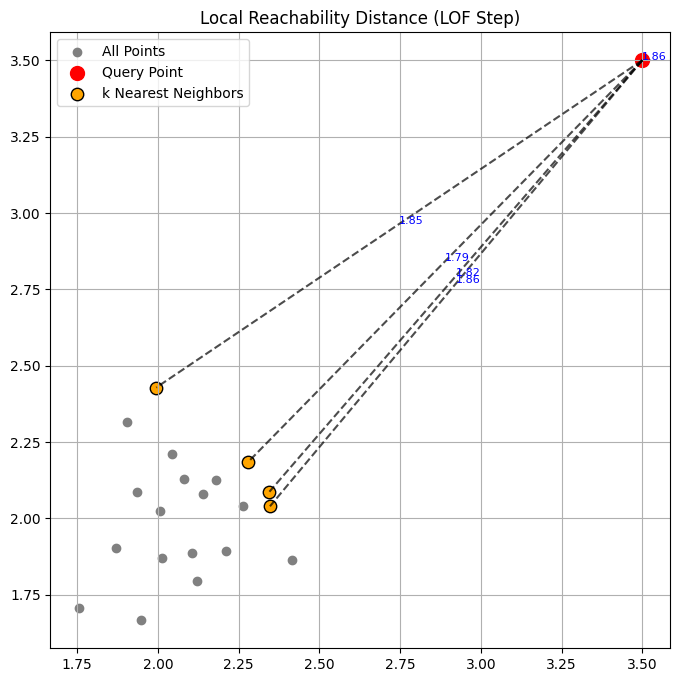

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Create a simple cluster with one outlier
X_cluster = np.random.randn(20, 2) * 0.2 + np.array([2, 2])
X_outlier = np.array([[3.5, 3.5]])
X = np.vstack([X_cluster, X_outlier])

k = 5
query_idx = len(X) - 1  # the outlier point
query_point = X[query_idx]

# Fit Nearest Neighbors
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, indices = nn.kneighbors([query_point])
neighbor_idxs = indices[0]
neighbor_pts = X[neighbor_idxs]

# Calculate k-distance for each neighbor
k_distances = []
for idx in neighbor_idxs:
    dists, _ = nn.kneighbors([X[idx]])
    k_distances.append(dists[0][-1])

# Calculate reachability distances
reach_dists = [max(kd, np.linalg.norm(query_point - X[idx])) for kd, idx in zip(k_distances, neighbor_idxs)]
lrd = 1 / (np.mean(reach_dists))

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='gray', label='All Points')
ax.scatter(query_point[0], query_point[1], color='red', s=100, label='Query Point')
ax.scatter(neighbor_pts[1:, 0], neighbor_pts[1:, 1], color='orange', edgecolor='black', s=80, label='k Nearest Neighbors')

# Dashed lines for reachability distance
for i, idx in enumerate(neighbor_idxs):
    dist = np.linalg.norm(query_point - X[idx])
    reach_dist = reach_dists[i]
    ax.plot([query_point[0], X[idx, 0]], [query_point[1], X[idx, 1]], 'k--', alpha=0.7)
    ax.annotate(f"{reach_dist:.2f}", ((query_point[0] + X[idx, 0]) / 2,
                                      (query_point[1] + X[idx, 1]) / 2), fontsize=8, color='blue')

# Annotations
ax.set_title("Local Reachability Distance (LOF Step)")
ax.legend()
ax.grid(True)
plt.show()


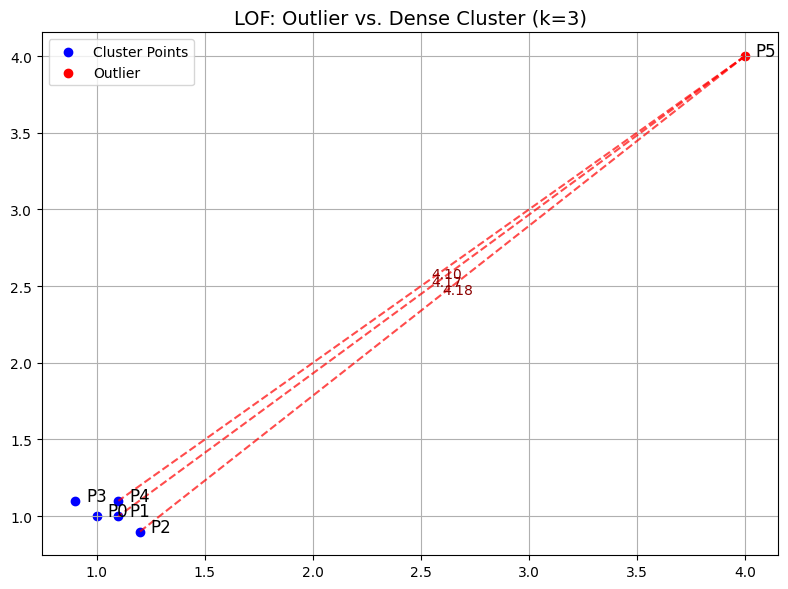


### Step-by-Step LOF Calculation (for Outlier P5)
- **Reachability distances** to neighbors: [4.1, 4.17, 4.18]
- **Average Reachability Distance** = 4.15
- **Local Reachability Density (LRD)** of P5 = 0.24
- **LRD of neighbors** = [5.92, 5.31, 5.1]
- **LOF Score** = 22.59


In [14]:
# Re-import required packages after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from IPython.display import display, Markdown

# Create synthetic data with a clear outlier
X = np.array([
    [1, 1], [1.1, 1], [1.2, 0.9], [0.9, 1.1], [1.1, 1.1],  # Dense cluster
    [4, 4]  # Outlier
])

# Plot the points and annotate
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:-1, 0], X[:-1, 1], c='blue', label='Cluster Points')
ax.scatter(X[-1, 0], X[-1, 1], c='red', label='Outlier')
for i, point in enumerate(X):
    ax.annotate(f"P{i}", (point[0] + 0.05, point[1]), fontsize=12)

# Nearest neighbors for visualization
k = 3
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Draw lines from outlier to its k neighbors
outlier_index = len(X) - 1
neighbors_of_outlier = indices[outlier_index][1:]
for idx in neighbors_of_outlier:
    ax.plot([X[outlier_index, 0], X[idx, 0]], [X[outlier_index, 1], X[idx, 1]],
            'r--', alpha=0.7)

# Show reachability distances (max of true distance and neighbor's k-distance)
k_distances = distances[:, -1]
reachability_distances = []
for idx in neighbors_of_outlier:
    true_dist = np.linalg.norm(X[outlier_index] - X[idx])
    reach_dist = max(true_dist, k_distances[idx])
    reachability_distances.append(reach_dist)
    mid = (X[outlier_index] + X[idx]) / 2
    ax.text(mid[0], mid[1], f"{reach_dist:.2f}", color='darkred', fontsize=10)

ax.set_title("LOF: Outlier vs. Dense Cluster (k=3)", fontsize=14)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Step-by-step LOF score
reach_avg = np.mean(reachability_distances)
lrd_outlier = 1 / reach_avg

# LRD of neighbors (just for example)
lrd_neighbors = []
for idx in neighbors_of_outlier:
    neighbor_neighbors = indices[idx][1:]
    dists = []
    for j in neighbor_neighbors:
        true_dist = np.linalg.norm(X[idx] - X[j])
        dists.append(max(true_dist, k_distances[j]))
    lrd_neighbors.append(1 / np.mean(dists))

lof_score = np.mean([lrd / lrd_outlier for lrd in lrd_neighbors])

summary_md = f"""
### Step-by-Step LOF Calculation (for Outlier P{outlier_index})
- **Reachability distances** to neighbors: {np.round(reachability_distances, 2).tolist()}
- **Average Reachability Distance** = {reach_avg:.2f}
- **Local Reachability Density (LRD)** of P{outlier_index} = {lrd_outlier:.2f}
- **LRD of neighbors** = {[round(val, 2) for val in lrd_neighbors]}
- **LOF Score** = {lof_score:.2f}
"""

display(Markdown(summary_md))


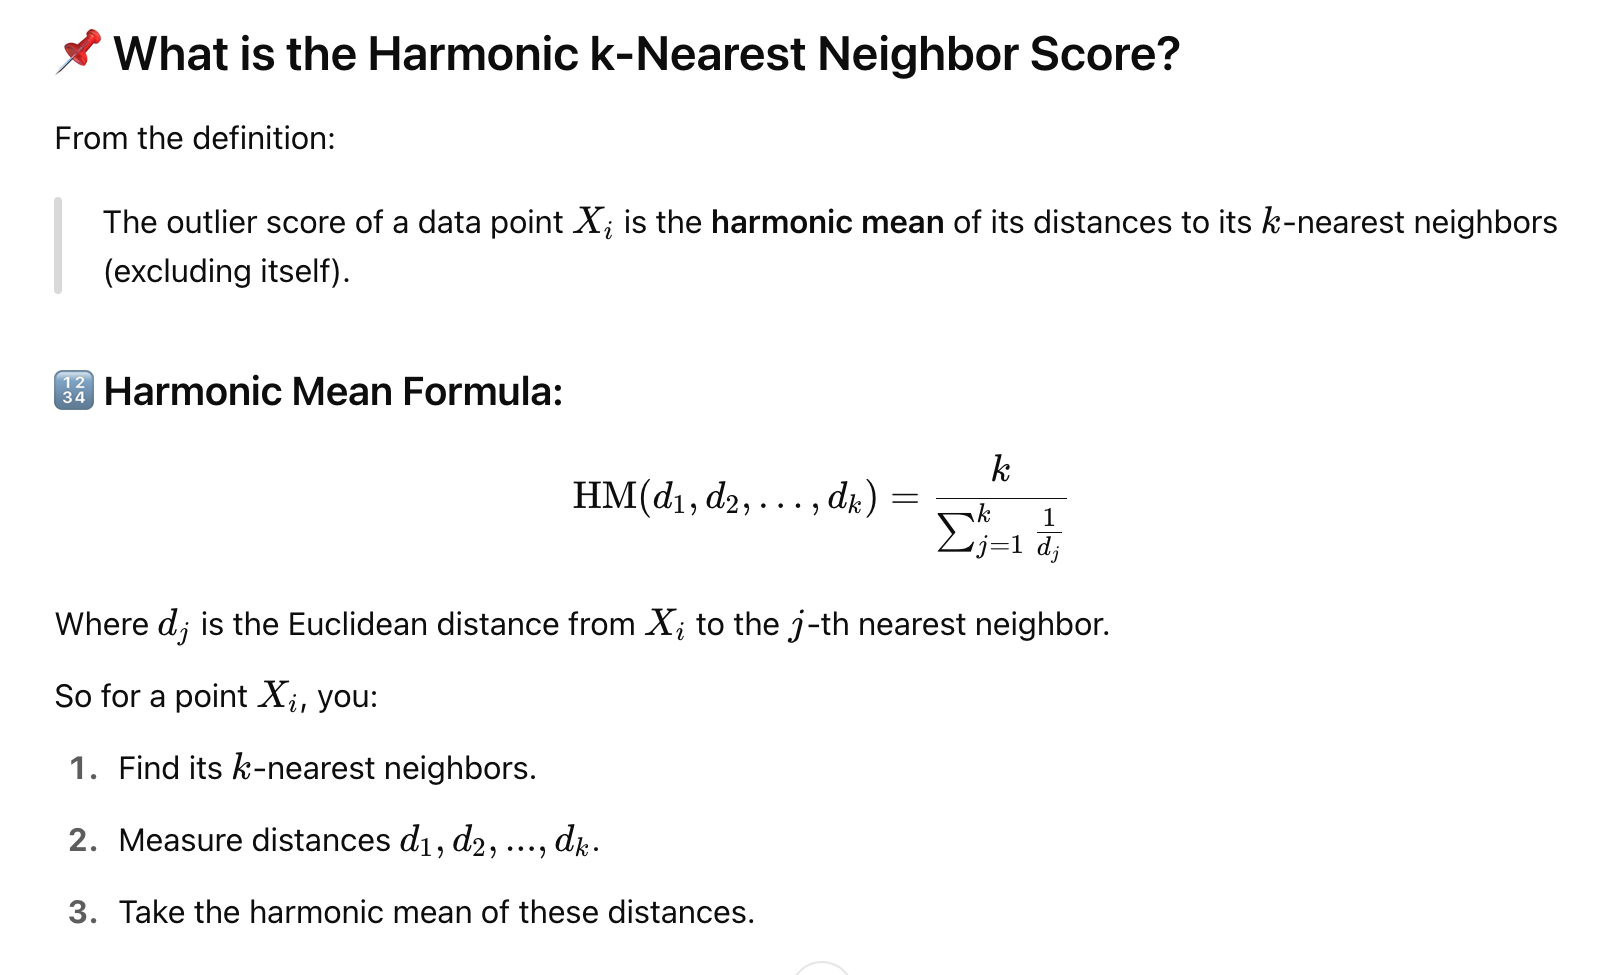

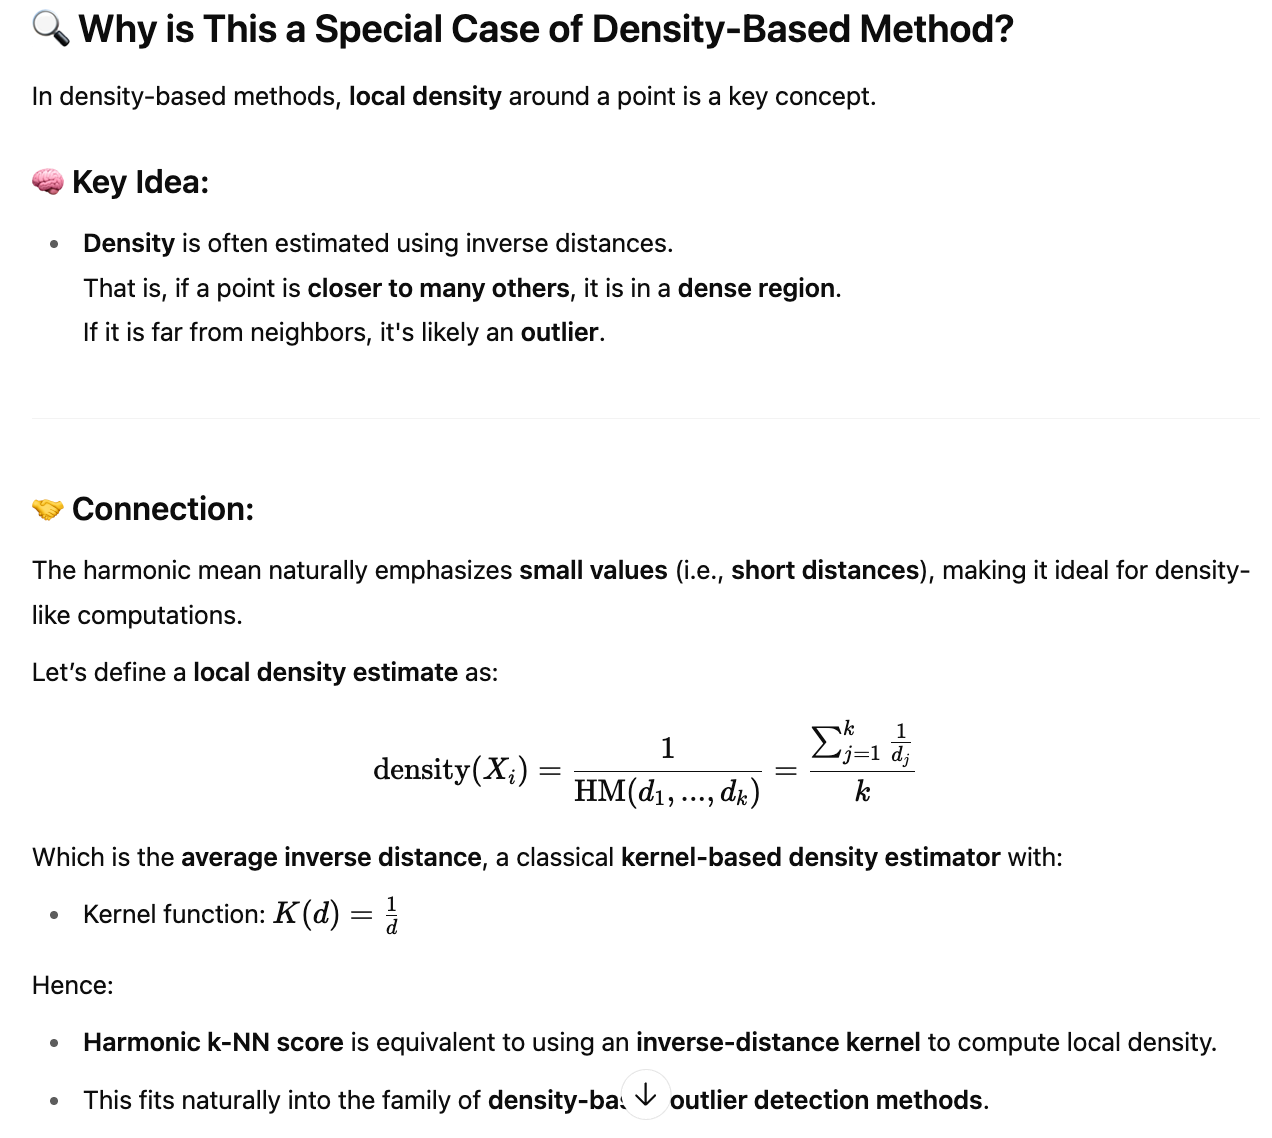

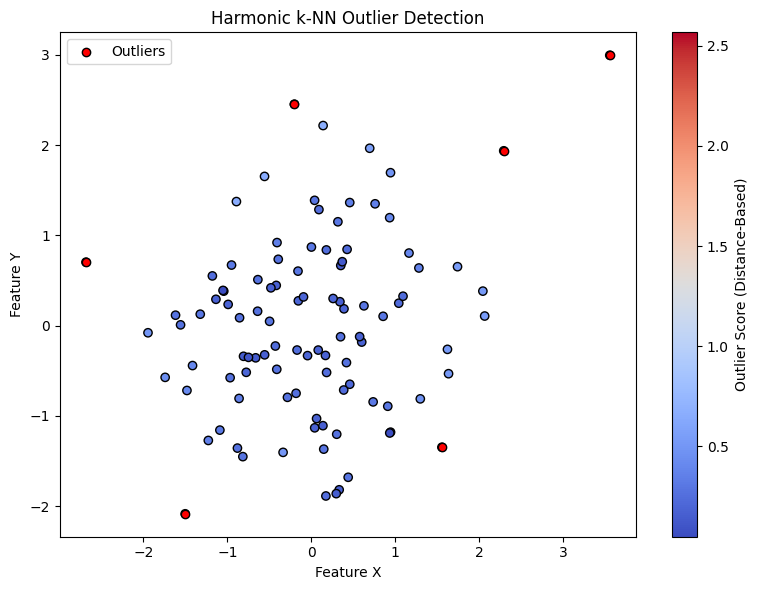

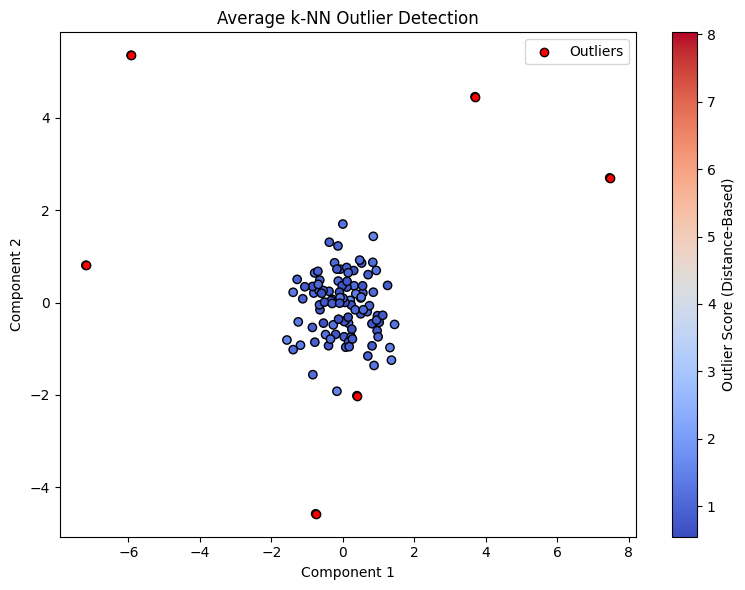

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class KNNOutlierDetector:
    """
    K-Nearest Neighbors Distance-Based Outlier Detector.

    This class implements a simple distance-based outlier detection method using k-nearest neighbors (k-NN).
    It supports multiple scoring strategies and provides tools for preprocessing, fitting, scoring, and visualizing.

    Parameters
    ----------
    X : np.ndarray or pd.DataFrame
        Input data to detect outliers from. Can be 2D or higher-dimensional.
    k : int, default=5
        Number of neighbors to use in distance calculation.
    method : {'kth', 'average', 'harmonic'}, default='kth'
        Scoring method:
        - 'kth': use distance to the k-th nearest neighbor
        - 'average': use the mean distance to the k nearest neighbors
        - 'harmonic': use the harmonic mean of distances to the k nearest neighbors
    scale : bool, default=True
        Whether to standardize features before fitting.
    filter_percentile : float or None, default=None
        Optional. If set, will remove extreme values (both tails) before fitting based on Euclidean distance
        from the mean. Useful to avoid skewed cluster centers due to strong outliers.
    threshold_percentile : float, default=95
        Percentile threshold to classify outliers after scoring.
        Points with scores >= this percentile will be labeled as outliers.

    Attributes
    ----------
    scores : np.ndarray
        Outlier scores computed based on selected distance method.
    is_outlier : np.ndarray of bool
        Boolean array indicating which points are classified as outliers.
    X : np.ndarray
        The preprocessed input data used in scoring.

    Methods
    -------
    fit()
        Fit the detector, compute outlier scores, and classify outliers.
    plot()
        Visualize outlier scores and highlight detected outliers.
        If input has more than 2 dimensions, PCA is applied for plotting.

    Example
    -------
    >>> detector = KNNOutlierDetector(X, k=5, method='average', filter_percentile=5)
    >>> detector.fit()
    >>> detector.plot()
    """

    def __init__(self, X, k=5, method='kth', scale=True,
                 filter_percentile=None, threshold_percentile=95):
        self.X_raw = X.copy()
        self.k = k
        self.method = method
        self.scale = scale
        self.filter_percentile = filter_percentile
        self.threshold_percentile = threshold_percentile

        self.scaler = StandardScaler() if scale else None
        self.fitted = False

        self.X = self.preprocess(self.X_raw)

    def preprocess(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        if self.filter_percentile is not None:
            center = np.mean(X, axis=0)
            dists = np.linalg.norm(X - center, axis=1)
            lower = np.percentile(dists, self.filter_percentile)
            upper = np.percentile(dists, 100 - self.filter_percentile)
            mask = (dists >= lower) & (dists <= upper)
            X = X[mask]

        if self.scale:
            X = self.scaler.fit_transform(X)

        return X

    def fit(self):
        nn = NearestNeighbors(n_neighbors=self.k + 1).fit(self.X)
        distances, _ = nn.kneighbors(self.X)
        dists = distances[:, 1:]  # exclude self

        if self.method == 'kth':
            self.scores = dists[:, -1]
        elif self.method == 'average':
            self.scores = dists.mean(axis=1)
        elif self.method == 'harmonic':
            self.scores = self.k / np.sum(1.0 / dists, axis=1)
        else:
            raise ValueError(f"Unknown method: {self.method}. Choose from 'kth', 'average', 'harmonic'.")

        threshold_value = np.percentile(self.scores, self.threshold_percentile)
        self.is_outlier = self.scores >= threshold_value
        self.fitted = True
        return self

    def plot(self):
        if not self.fitted:
            raise RuntimeError("Model must be fitted before plotting.")

        # Apply PCA only if dimensionality > 2
        if self.X.shape[1] > 2:
            X_plot = PCA(n_components=2).fit_transform(self.X)
        else:
            X_plot = self.X

        fig, ax = plt.subplots(figsize=(8, 6))

        sc = ax.scatter(X_plot[:, 0], X_plot[:, 1], c=self.scores, cmap='coolwarm', edgecolor='k')
        ax.scatter(X_plot[self.is_outlier][:, 0], X_plot[self.is_outlier][:, 1],
                   c='red', edgecolor='k', label='Outliers')

        ax.set_title(f"{self.method.title()} k-NN Outlier Detection")
        ax.set_xlabel("Component 1" if self.X.shape[1] > 2 else "Feature X")
        ax.set_ylabel("Component 2" if self.X.shape[1] > 2 else "Feature Y")
        cb = plt.colorbar(sc, ax=ax)
        cb.set_label("Outlier Score (Distance-Based)")
        ax.legend()
        plt.tight_layout()
        plt.show()

# Test example
np.random.seed(42)
X_normal = np.random.randn(100, 2) * 0.75 + np.array([2, 2])
X_outliers = np.random.uniform(low=-2, high=6, size=(5, 2))
X_all = np.vstack([X_normal, X_outliers])

knn_detector = KNNOutlierDetector(X_all, k=5, method='harmonic', filter_percentile=1, threshold_percentile=95)
knn_detector.fit()
knn_detector.plot()

# Test with 5D data
np.random.seed(42)
X_5d_normal = np.random.randn(100, 5) * 0.5 + 1
X_5d_outliers = np.random.uniform(low=-3, high=5, size=(5, 5))
X_5d_all = np.vstack([X_5d_normal, X_5d_outliers])

knn_detector_highdim = KNNOutlierDetector(X_5d_all, k=5, method='average', threshold_percentile=95)
knn_detector_highdim.fit()
knn_detector_highdim.plot()


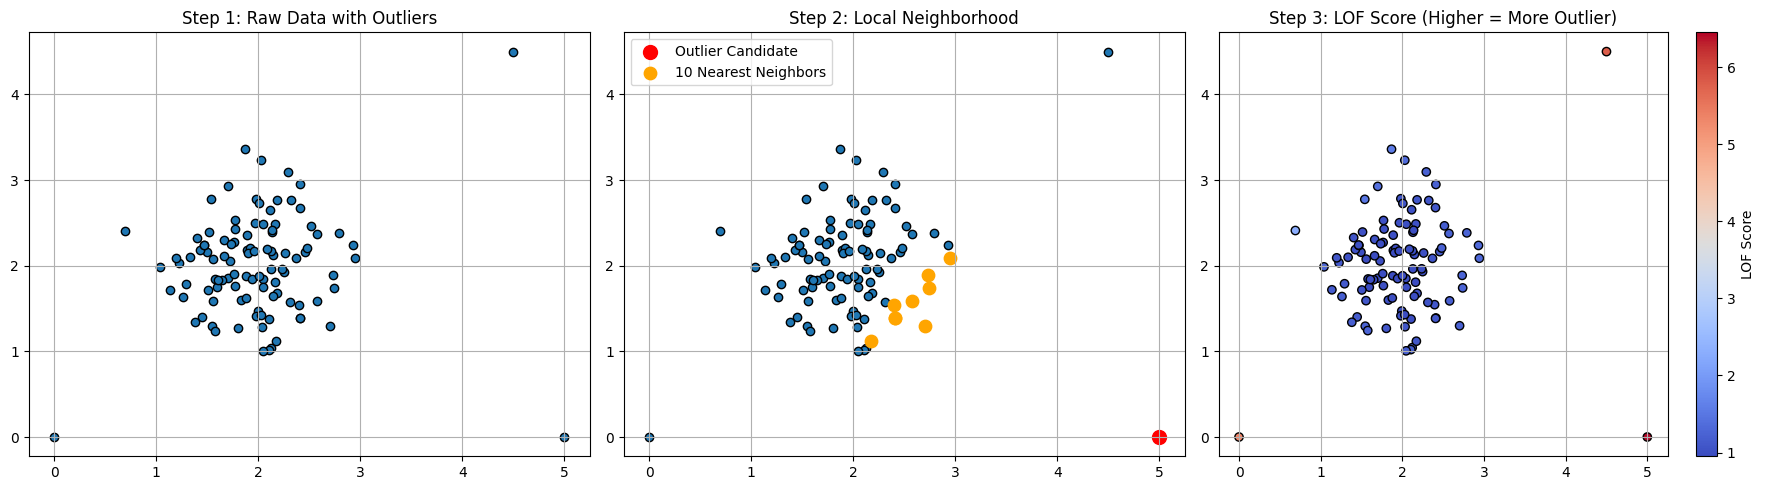

In [16]:
# Re-run all necessary imports and setup after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Generate synthetic data with outliers
np.random.seed(42)
X_normal = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
X_outliers = np.array([[0, 0], [4.5, 4.5], [5, 0]])
X = np.vstack([X_normal, X_outliers])

# Step 2: Apply Local Outlier Factor
k = 10
lof = LocalOutlierFactor(n_neighbors=k)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Step 3: Visualize step-by-step
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Step 1: Raw data
axs[0].scatter(X[:, 0], X[:, 1], edgecolor='k')
axs[0].set_title("Step 1: Raw Data with Outliers")
axs[0].grid(True)

# Step 2: Neighborhood density estimation (conceptual)
sample_idx = -1  # pick one clear outlier
neighbors = lof.kneighbors([X[sample_idx]], return_distance=False)[0][1:]
axs[1].scatter(X[:, 0], X[:, 1], edgecolor='k')
axs[1].scatter(X[sample_idx, 0], X[sample_idx, 1], color='red', s=100, label='Outlier Candidate')
axs[1].scatter(X[neighbors, 0], X[neighbors, 1], color='orange', s=80, label=f'{k} Nearest Neighbors')
axs[1].set_title("Step 2: Local Neighborhood")
axs[1].legend()
axs[1].grid(True)

# Step 3: LOF score coloring
sc = axs[2].scatter(X[:, 0], X[:, 1], c=lof_scores, cmap='coolwarm', edgecolor='k')
axs[2].set_title("Step 3: LOF Score (Higher = More Outlier)")
cb = plt.colorbar(sc, ax=axs[2])
cb.set_label("LOF Score")
axs[2].grid(True)

plt.tight_layout()
plt.show()


$$
\text{score}(X) = \sum_{j=1}^{d} \frac{\left((X - \mu) \cdot e_j\right)^2}{\lambda_j}
$$

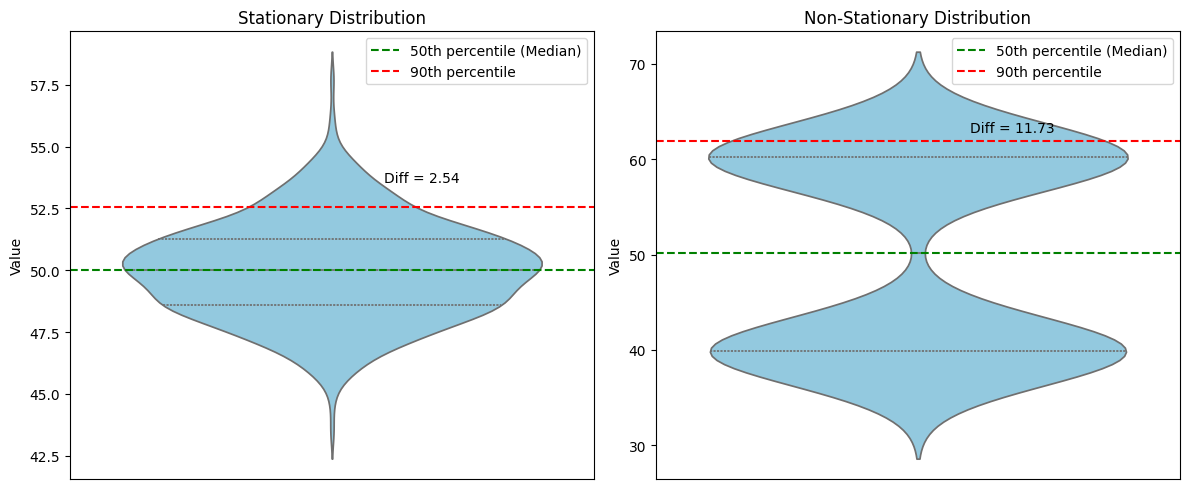

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated non-stationary and stationary data
np.random.seed(42)
data_stationary = np.random.normal(loc=50, scale=2, size=500)
data_non_stationary = np.concatenate([
    np.random.normal(loc=40, scale=2, size=250),
    np.random.normal(loc=60, scale=2, size=250)
])

def plot_distribution(data, title, ax):
    sns.violinplot(data, ax=ax, inner='quartile', color="skyblue")
    q50 = np.percentile(data, 50)
    q90 = np.percentile(data, 90)
    
    ax.axhline(q50, color='green', linestyle='--', label='50th percentile (Median)')
    ax.axhline(q90, color='red', linestyle='--', label='90th percentile')
    ax.text(0.1, q90 + 1, f'Diff = {q90 - q50:.2f}', color='black')
    ax.set_title(title)
    ax.set_ylabel("Value")
    ax.set_xticks([])
    ax.legend()

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_distribution(data_stationary, "Stationary Distribution", axes[0])
plot_distribution(data_non_stationary, "Non-Stationary Distribution", axes[1])
plt.tight_layout()
plt.show()


In [18]:

    feature_groups = {
                        
                        "signal_quality": [
                            "4GRSRP", "4GRSRQ", "SNR", "4GSignal", "5GRSRP", "5GRSRQ", "5GSNR",
                            "BRSRP", "RSRQ", "CQI", "PathLoss",
                            "PCellID", "CellID",
                            "5GEARFCN_DL", "5GEARFCN_UL", "EARFCN_DL", "EARFCN_UL",
                            "5GPccBand", "5GScc1Band", "5GScc2Band", "5GScc3Band",
                            "4GPccBand", "4GScc1Band", "4GScc2Band", "4GScc3Band",
                            "B1MeasurementConfigurationBands", "CurrentNetwork"
                        ],
                        
                        "hardware_health": [
                            "4GAntennaTemp", "4GAntennaTempThreshold",
                            "5GNRSub6AntennaTemp", "5GNRSub6AntennaTempThreshold",
                            "5GModemTempThreshold", "ModemTemp",
                            "4GTempFallback", "4GTempFallbackCause",
                            "5GServiceThermalDegradation", "5GServiceThermalDegradationCause",
                            "CPUUsage","MemoryAvail", "MemoryPercentFree", "load_date", "hr"
                        ],
                        
                        "throughput_data": [
                            "LTEPDSCHPeakThroughput", "LTEPDSCHThroughput",
                            "LTEPUSCHPeakThroughput", "LTEPUSCHThroughput",
                            "TxPDCPBytes", "RxPDCPBytes",
                            "TotalBytesReceived", "TotalBytesSent",
                            "TotalPacketReceived", "TotalPacketSent",
                            "5GNRPDSCHThroughput", "5GNRPUSCHThroughput",
                            "5GNRPDSCHPeakThroughput", "5GNRPUSCHPeakThroughput",
                            "5GNRRxPDCPBytes", "5GNRTxPDCPBytes"
                        ],
                        
    }


    FEATURE_COL = "4GRSRP"
    TIME_COL = "time"
    
    for f in feature_groups["signal_quality"]+feature_groups["throughput_data"]:
        FEATURE_COL = f
        #-----------------------------------------------------------------
        # 1. Read and preprocess data from date list
        start_date = datetime.strptime("2025-06-22", "%Y-%m-%d")
        end_date = datetime.strptime("2025-07-22", "%Y-%m-%d")
        date_list = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end_date - start_date).days + 1)]
        heartbeat_base = "/user/ZheS/owl_anomaly/processed_data/reboot_mdn_heartbeats/date="
        paths = [heartbeat_base + date_str for date_str in date_list]

        df_raw = spark.read.parquet(*paths)
        df_converted = convert_string_numerical(df_raw, [FEATURE_COL])
        df_filtered = df_converted.select("sn", TIME_COL, FEATURE_COL)
        #-----------------------------------------------------------------

        # 2. Define output schema
        schema = StructType([
                            StructField("sn", StringType(), True),
                            StructField(TIME_COL, TimestampType(), True),
                            StructField(FEATURE_COL, FloatType(), True),
                            StructField("is_outlier", BooleanType(), True)
                        ])

        # 3. UDF
        def detect_kde_outliers(group_df: pd.DataFrame) -> pd.DataFrame:
            if len(group_df) < 10:
                return pd.DataFrame([], columns=schema.fieldNames())
            try:
                group_df = group_df.sort_values(TIME_COL)  # ✅ Ensure time ordering
                detector = FeaturewiseKDENoveltyDetector(
                    df=group_df,
                    feature_col=FEATURE_COL,
                    time_col=TIME_COL,
                    train_idx="all",
                    new_idx="all",
                    filter_percentile=100,
                    threshold_percentile=99,
                    anomaly_direction="low"
                )
                return detector.fit()
            except Exception:
                return pd.DataFrame([], columns=schema.fieldNames())

        # 4. Run anomaly detection in parallel
        df_anomaly_result = df_filtered.groupBy("sn").applyInPandas(detect_kde_outliers, schema=schema)
        df_anomaly_result.show()
        # 5. Write to HDFS
        df_anomaly_result.write.mode("overwrite").parquet(f"/user/ZheS/owl_anomally/reboot_custome/all_period/outlier_{FEATURE_COL}/kde")



NameError: name 'datetime' is not defined

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import sum, lag, col, split, concat_ws, lit, udf, count, max, avg, when, to_date, explode, last
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, FloatType, BooleanType

from datetime import datetime, timedelta, date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Added these here as they are used in EWMA
import sys

sys.path.append('/usr/apps/vmas/scripts/ZS/owl_anomaly')
from FeaturewiseKDENoveltyDetector import FeaturewiseKDENoveltyDetector
from DBSCANOutlierDetector import DBSCANOutlierDetector
from ARIMAAnomalyDetector import ARIMAAnomalyDetector
from EWMAAnomalyDetector import EWMAAnomalyDetector

class EWMAAnomalyDetector:
    """
    EWMA-based anomaly detector with optional scaling and flexible recent window evaluation.

    Parameters:
        df (pd.DataFrame): Input time series data.
        feature (str): Target feature to detect anomalies on.
        recent_window_size (int or str): 'all' or integer; number of recent points to evaluate in scoring.
        window (int): Span for EWMA and rolling std.
        no_of_stds (float): Control limit multiplier.
        n_shift (int): Shift to prevent leakage.
        anomaly_direction (str): One of {'both', 'high', 'low'}.
        scaler (str or object): Optional scaler: 'standard', 'minmax', or custom scaler with fit_transform and inverse_transform.
    """

    def __init__(
        self,
        df,
        feature,
        timestamp_col="time",
        recent_window_size=600,
        window=10,
        no_of_stds=2.0,
        n_shift=1,
        anomaly_direction="low",
        scaler=None
    ):
        assert anomaly_direction in {"both", "high", "low"}
        assert scaler in {None, "standard", "minmax"} or hasattr(scaler, "fit_transform")
        assert isinstance(recent_window_size, (int, type(None), str))

        self.df_original = df.copy()
        self.feature = feature
        self.timestamp_col = timestamp_col
        self.window = window
        self.no_of_stds = no_of_stds
        self.n_shift = n_shift
        self.recent_window_size = recent_window_size
        self.anomaly_direction = anomaly_direction
        self.df_ = None
        self.scaler_type = scaler
        self._scaler = None

    def _apply_scaler(self, df):
        df = df.copy()
        if self.scaler_type is None:
            df['feature_scaled'] = df[self.feature]
        else:
            if self.scaler_type == "standard":
                self._scaler = StandardScaler()
            elif self.scaler_type == "minmax":
                self._scaler = MinMaxScaler()
            else:
                self._scaler = self.scaler_type
            df['feature_scaled'] = self._scaler.fit_transform(df[[self.feature]])
        return df

    def _inverse_scaler(self, series):
        if self._scaler is None:
            return series
        return self._scaler.inverse_transform(series.values.reshape(-1, 1)).flatten()

    def _add_ewma(self):
        df = self._apply_scaler(self.df_original)
        target = df['feature_scaled'].shift(self.n_shift)
        df['EMA'] = target.ewm(span=self.window, adjust=False).mean()
        df['rolling_std'] = target.rolling(window=self.window).std()
        df['UCL'] = df['EMA'] + self.no_of_stds * df['rolling_std']
        df['LCL'] = df['EMA'] - self.no_of_stds * df['rolling_std']
        return df

    def _detect_anomalies(self, df):
        if self.anomaly_direction == "high":
            df['is_outlier'] = df['feature_scaled'] > df['UCL']
        elif self.anomaly_direction == "low":
            df['is_outlier'] = df['feature_scaled'] < df['LCL']
        else:
            df['is_outlier'] = (df['feature_scaled'] > df['UCL']) | (df['feature_scaled'] < df['LCL'])
        return df

    def fit(self):
        df = self._add_ewma()
        df = self._detect_anomalies(df)
        df_clean = df.dropna(subset=["EMA", "UCL", "LCL", "feature_scaled"])

        if self.recent_window_size in [None, "all"]:
            recent_df = df_clean
        else:
            recent_df = df_clean.tail(self.recent_window_size)

        self.df_ = df
        return recent_df[recent_df["is_outlier"]][["sn", self.timestamp_col, self.feature, "is_outlier"]]




# ------------------------------
# Main Entry Point for PySpark
# ------------------------------
def convert_string_numerical(df, numerical_cols):

    for col_name in numerical_cols:
        if col_name in df.columns:
            df = df.withColumn(col_name, col(col_name).cast("double"))
    return df
    

if __name__ == "__main__":
    spark = SparkSession.builder.appName('Zhe_EWMA_Anomaly_Detection')\
                        .config("spark.ui.port", "24041")\
                        .getOrCreate()
    spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
    feature_groups = {
                    "signal_quality": [
                        "4GRSRP", "4GRSRQ", "SNR", "4GSignal", "5GRSRP", "5GRSRQ", "5GSNR",
                        "BRSRP", "RSRQ", "CQI", 
                    ],
                    "throughput_data": [
                        "LTEPDSCHPeakThroughput", "LTEPDSCHThroughput",
                        "LTEPUSCHPeakThroughput", "LTEPUSCHThroughput",
                        "TxPDCPBytes", "RxPDCPBytes",
                        "TotalBytesReceived", "TotalBytesSent",
                        "TotalPacketReceived", "TotalPacketSent",
                        "5GNRPDSCHThroughput", "5GNRPUSCHThroughput",
                        "5GNRPDSCHPeakThroughput", "5GNRPUSCHPeakThroughput",
                        "5GNRRxPDCPBytes", "5GNRTxPDCPBytes"
                    ],                    
        }
    TIME_COL = "time"
    
    for feature_col in feature_groups["signal_quality"]+feature_groups["throughput_data"]:
        FEATURE_COL = feature_col
        try:  
            # 1. Read and preprocess data from date list
            start_date = datetime.strptime("2025-06-22", "%Y-%m-%d")
            end_date = datetime.strptime("2025-07-22", "%Y-%m-%d")
            date_list = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d")
                        for i in range((end_date - start_date).days + 1)]
            heartbeat_base = "/user/ZheS/owl_anomally/processed_data/reboot_mdn_heartbeats/date="
            paths = [heartbeat_base+date_str for date_str in date_list]

            df_raw = spark.read.parquet(*paths)
            df_converted = convert_string_numerical(df_raw, [FEATURE_COL])
            df_filtered = df_converted.select("sn", TIME_COL, FEATURE_COL)
            
            # 2. Define output schema
            schema = StructType([
                                StructField("sn", StringType(), True),
                                StructField(TIME_COL, TimestampType(), True),
                                StructField(FEATURE_COL, FloatType(), True),
                                StructField("is_outlier", BooleanType(), True)
                            ])

            # 3. UDF for applyInPandas
            def udf_detect_ewma_outliers(group_df: pd.DataFrame) -> pd.DataFrame:
                if len(group_df) < 10:
                    return pd.DataFrame([], columns=schema.fieldNames())
                try:
                    group_df = group_df.sort_values(TIME_COL)  # ✅ Ensure time ordering
                    group_df[FEATURE_COL] = group_df[FEATURE_COL].ffill()

                    detector = EWMAAnomalyDetector(df = group_df, 
                                                    feature=FEATURE_COL, 
                                                    timestamp_col = TIME_COL,
                                                    recent_window_size="all",
                                                    window=72,
                                                    no_of_stds=3.0,
                                                    n_shift=1,
                                                    anomaly_direction="low",
                                                    scaler="standard"
                                                                    )
                    return detector.fit()
                except Exception:
                    return pd.DataFrame([], columns=schema.fieldNames())

            # 4. Run EWMA detection using applyInPandas
            df_anomaly_result = df_filtered.groupBy("sn").applyInPandas(udf_detect_ewma_outliers, schema=schema)

            # 5. Write results
            df_anomaly_result.write.mode("overwrite").parquet(f"/user/ZheS/owl_anomally/dailyrawreboot/outlier_{FEATURE_COL}/EWMA")


        except Exception as e:
            print( e , feature_col)





Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Define the file path
file_path = '/Users/Downloads/export.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    
    # Display the first few rows of the DataFrame to verify
    print(df.head())
    
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file was not found at /Users/Downloads/export.csv


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


$$
g(o) = \frac{\sum_{i=1}^k f(o_i)}{k}
$$


In [ ]:
#!/bin/bash 

export HADOOP_HOME=/usr/apps/vmas/hadoop-3.3.6 
export SPARK_HOME=/usr/apps/vmas/spark 
export PYSPARK_PYTHON=/usr/apps/vmas/anaconda3/bin/python3 
echo "RES: Starting" 
echo $(date) 
/usr/apps/vmas/spark/bin/spark-submit \
--master spark://njbbvmaspd11.nss.vzwnet.com:7077 \
--conf "spark.sql.session.timeZone=UTC" \
--conf "spark.driver.maxResultSize = 128g" \
--conf "spark.dynamicAllocation.enabled=false" \
--num-executors 150 \
--executor-cores 2 \
--total-executor-cores 300 \
--executor-memory 10g \
--driver-memory 128g \
/usr/apps/vmas/scripts/ZS/snap/VMAS-Post-SNAP-Maintenance-Alert/vmb_post_snap.py > \
/usr/apps/vmas/scripts/ZS/snap/VMAS-Post-SNAP-Maintenance-Alert/vmb_post_snap.log

 
 



In [ ]:
mobility_stability = " Mobility/call-procedure counters and timings. Raw counts: higher attempts ≠ bad, but higher failures and higher failure rates = worse.
LTEHandOverAttemptCount, LTEHandOverFailureCount — LTE handover attempts/failures (counts). Use failure rate = Fail/Attempt. LTERACHAttemptCount, LTERACHFailureCount — LTE RACH access attempts/failures (counts). Use failure rate. LTERadioLinkFailureCount — LTE radio link failures (count). Higher = worse. RRCConnectRequestCount, RRCConnectFailureCount — RRC connection requests/failures (counts). Use failure rate. RRCConnectTime — RRC connection setup time (ms/s). Higher = slower setup (worse).
5GNRHandOverAttemptCount, 5GNRHandOverFailureCount — NR handover attempts/failures. Use failure rate. 5GNRRACHAttemptCount, 5GNRRACHFailureCount — NR RACH attempts/failures. Use failure rate. 5GNRRadioLinkFailureCount — NR radio link failures (count). Higher = worse. 5GNRRRCConnectRequestCount, 5GNRRRCConnectFailureCount — NR RRC requests/failures. Use failure rate. 5GNRRRCConnectTime — NR RRC setup time (ms/s). Higher = slower setup (worse).
NRSCGChangeCount, NRSCGChangeFailureCount, NRSCGFailureCount — Secondary Cell Group change attempts/failures (NR). Use failure rate; very high change activity can indicate instability.
(Notes) Prefer normalized KPIs (fail/attempt, per-hour rates) and trend features. Counts may surge during mobility or recoveries; interpret in context.

mobility_stability = " Mobility/call-procedure counters and timings. Raw counts: higher attempts ≠ bad, but higher failures and higher failure rates = worse.
LTEHandOverAttemptCount, LTEHandOverFailureCount — LTE handover attempts/failures (counts). Use failure rate = Fail/Attempt. LTERACHAttemptCount, LTERACHFailureCount — LTE RACH access attempts/failures (counts). Use failure rate. LTERadioLinkFailureCount — LTE radio link failures (count). Higher = worse. RRCConnectRequestCount, RRCConnectFailureCount — RRC connection requests/failures (counts). Use failure rate. RRCConnectTime — RRC connection setup time (ms/s). Higher = slower setup (worse).
5GNRHandOverAttemptCount, 5GNRHandOverFailureCount — NR handover attempts/failures. Use failure rate. 5GNRRACHAttemptCount, 5GNRRACHFailureCount — NR RACH attempts/failures. Use failure rate. 5GNRRadioLinkFailureCount — NR radio link failures (count). Higher = worse. 5GNRRRCConnectRequestCount, 5GNRRRCConnectFailureCount — NR RRC requests/failures. Use failure rate. 5GNRRRCConnectTime — NR RRC setup time (ms/s). Higher = slower setup (worse).
NRSCGChangeCount, NRSCGChangeFailureCount, NRSCGFailureCount — Secondary Cell Group change attempts/failures (NR). Use failure rate; very high change activity can indicate instability.
(Notes) Prefer normalized KPIs (fail/attempt, per-hour rates) and trend features. Counts may surge during mobility or recoveries; interpret in context.